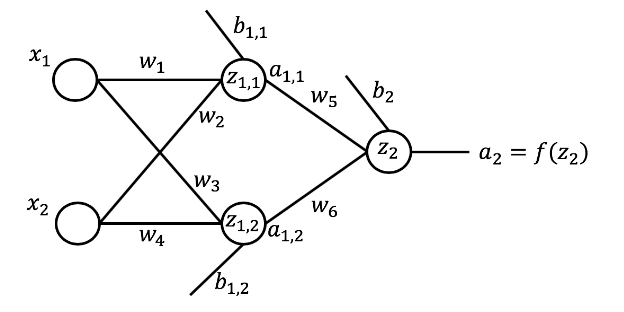

Generate weights and biases for a simple neural network:
Two inputs, two nodes in one hidden layer, one output

In [1]:
import numpy as np # import Numpy library to generate 

weights = np.around(np.random.uniform(size=6), decimals=2) # initialize the weights
biases = np.around(np.random.uniform(size=3), decimals=2) # initialize the biases

In [2]:
print(weights)
print(biases)

[0.32 0.28 0.99 0.75 0.8  0.76]
[0.63 0.44 0.18]


Define the inputs, then build the calculation for the output

In [3]:
# Define input
x_1 = 0.5 # input 1
x_2 = 0.85 # input 2

print('x1 is {} and x2 is {}'.format(x_1, x_2))

x1 is 0.5 and x2 is 0.85


In [4]:
# Find the weighted sum of the inputs at the first node of the hidden layer

z_11 = x_1 * weights[0] + x_2 * weights[1] + biases[0]

print('The weighted sum of the inputs at the first node in the hidden layer is {}'.format(z_11))

The weighted sum of the inputs at the first node in the hidden layer is 1.028


In [5]:
# Find the weighted sum of the inputs at the second node of the hidden layer

z_12 = x_1 * weights[2] + x_2 * weights[3] + biases[1]

print('The weighted sum of the inputs at the first node in the hidden layer is {}'.format(z_12))

The weighted sum of the inputs at the first node in the hidden layer is 1.5724999999999998


In [6]:
# Use a sigmoid activation function to find the activation of the first node

a_11 = 1.0 / (1.0 + np.exp(-z_11))

print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals=4)))

The activation of the first node in the hidden layer is 0.7365


In [7]:
# Use a sigmoid activation function to find the activation of the second node

a_12 = 1.0 / (1.0 + np.exp(-z_12))

print('The activation of the first node in the hidden layer is {}'.format(np.around(a_12, decimals=4)))

The activation of the first node in the hidden layer is 0.8281


In [8]:
# Compute the weighted average of the outputs as input to the output layer

z_2 = a_11 * weights[4] + a_12 * weights[5] + biases[2]

print('The weighted sum of the inputs at the node in the output layer is {}'.format(np.around(z_2, decimals=4)))

The weighted sum of the inputs at the node in the output layer is 1.3986


In [9]:
# Calculate output of the network using sigmoid activation function

a_2 = 1.0 / (1.0 + np.exp(-z_2))
print('The output of the network for x1 = 0.5 and x2 = 0.85 is {}'.format(np.around(a_2, decimals=4)))

The output of the network for x1 = 0.5 and x2 = 0.85 is 0.802


Now automate the process to generate a neural network of arbitrary size and depth

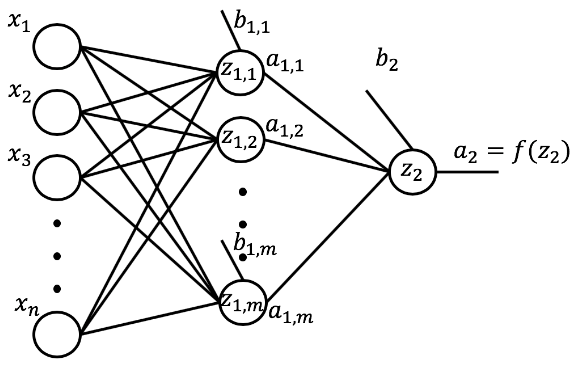

Define the structure of a more complex network

In [10]:
n = 2 # number of inputs
num_hidden_layers = 2 # number of hidden layers
m = [2, 2] # number of nodes in each hidden layer
num_nodes_output = 1 # number of nodes in the output layer

Generate weights and bias for each node in the network

In [11]:
num_nodes_previous = n # number of nodes in the previous layer

network = {} # initialize network an an empty dictionary

# loop through each layer and randomly initialize the weights and biases associated with each node
# notice how we are adding 1 to the number of hidden layers in order to include the output layer
for layer in range(num_hidden_layers + 1): 
    
    # determine name of layer
    if layer == num_hidden_layers:
        layer_name = 'output'
        num_nodes = num_nodes_output
    else:
        layer_name = 'layer_{}'.format(layer + 1)
        num_nodes = m[layer]
    
    # initialize weights and biases associated with each node in the current layer
    network[layer_name] = {}
    for node in range(num_nodes):
        node_name = 'node_{}'.format(node+1)
        network[layer_name][node_name] = {
            'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
            'bias': np.around(np.random.uniform(size=1), decimals=2),
        }
    
    num_nodes_previous = num_nodes
    
print(network) # print network

{'layer_1': {'node_1': {'weights': array([0.25, 0.76]), 'bias': array([0.62])}, 'node_2': {'weights': array([0.24, 0.63]), 'bias': array([0.94])}}, 'layer_2': {'node_1': {'weights': array([0.45, 0.03]), 'bias': array([0.31])}, 'node_2': {'weights': array([0.02, 0.07]), 'bias': array([0.73])}}, 'output': {'node_1': {'weights': array([0.94, 0.06]), 'bias': array([0.17])}}}


Create a function to initialize an arbitrary network based on input parameters

In [12]:
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
    
    num_nodes_previous = num_inputs # number of nodes in the previous layer

    network = {}
    
    # loop through each layer and randomly initialize the weights and biases associated with each layer
    for layer in range(num_hidden_layers + 1):
        
        if layer == num_hidden_layers:
            layer_name = 'output' # name last layer in the network output
            num_nodes = num_nodes_output
        else:
            layer_name = 'layer_{}'.format(layer + 1) # otherwise give the layer a number
            num_nodes = num_nodes_hidden[layer] 
        
        # initialize weights and bias for each node
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2),
            }
    
        num_nodes_previous = num_nodes

    return network # return the network

Use the function to create a network that takes five inputs, has three hidden layers, has three nodes in the first layer, two nodes in the second layer, and three nodes in the third layer, and has one node in the output layer

In [13]:
small_network = initialize_network(5, 3, [3, 2, 3], 1)

Compute the weighted sum at each node

In [14]:
def compute_weighted_sum(inputs, weights, bias):
    return np.sum(inputs * weights) + bias

In [15]:
from random import seed
np.random.seed(12)
inputs = np.around(np.random.uniform(size=5), decimals=2)

print('The inputs to the network are {}'.format(inputs))

The inputs to the network are [0.15 0.74 0.26 0.53 0.01]


In [19]:
# Compute the weighted sum at the first node in the first hidden layer
node_weights = small_network['layer_1']['node_1']['weights']
node_bias = small_network['layer_1']['node_1']['bias']

weighted_sum = compute_weighted_sum(inputs, node_weights, node_bias)
print('The weighted sum at the first node in the hidden layer is {}'.format(np.around(weighted_sum[0], decimals=4)))

The weighted sum at the first node in the hidden layer is 1.2686


Compute Node Activation

In [20]:
# Write a function that applies the sigmoid function to compute activation

def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-1 * weighted_sum))

In [21]:
# Use the function to calculate the activation of the first node in the first hidden layer

activation = node_activation(weighted_sum)
print('The activation of the first node in the first hidden layer is {}'.format(np.around(activation, decimals=4)))

The activation of the first node in the first hidden layer is [0.7805]


Forward Propagation: Write a function that applies the compute_weighted_sum and node_activation functions to each node in the network and propogates the data to the output layer

In [22]:
def forward_propagate(network, inputs):
    
    layer_inputs = list(inputs) # start with the input layer as the input to the first hidden layer
    
    for layer in network:
        
        layer_data = network[layer]
        
        layer_outputs = [] 
        for layer_node in layer_data:
        
            node_data = layer_data[layer_node]
        
            # compute the weighted sum and the output of each node at the same time 
            node_output = node_activation(compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias']))
            layer_outputs.append(np.around(node_output[0], decimals=4))
            
        if layer != 'output':
            print('The outputs of the nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layer_outputs))
    
        layer_inputs = layer_outputs # set the output of this layer to be the input to next layer

    network_predictions = layer_outputs
    return network_predictions

In [24]:
# Use the function to compute the prediction of small_network

prediction = forward_propagate(small_network, inputs)
print('The predicted value by the network for the given input is {}'.format(np.around(prediction[0], decimals=4)))

The outputs of the nodes in hidden layer number 1 is [0.7805, 0.7527, 0.8379]
The outputs of the nodes in hidden layer number 2 is [0.9202, 0.8807]
The outputs of the nodes in hidden layer number 3 is [0.8796, 0.7582, 0.8957]
The predicted value by the network for the given input is 0.8875


In [28]:
# Define a new network and find the prediction using the defined functions

for i in range(5):
    new_network = initialize_network(3, 4, [5,4,3,2],1)
    inputs = np.around(np.random.uniform(size=3), decimals=4)
    print('Inputs: {}'.format(inputs))
    prediction = forward_propagate(new_network, inputs)
    print('Predicted value of the network: {}'.format(np.around(prediction[0], decimals=4)))

Inputs: [0.2089 0.9937 0.7793]
The outputs of the nodes in hidden layer number 1 is [0.6829, 0.9042, 0.887, 0.8525, 0.708]
The outputs of the nodes in hidden layer number 2 is [0.9669, 0.8522, 0.9309, 0.9644]
The outputs of the nodes in hidden layer number 3 is [0.9346, 0.8837, 0.9083]
The outputs of the nodes in hidden layer number 4 is [0.8537, 0.8732]
Predicted value of the network: 0.8879
Inputs: [0.2015 0.3293 0.9353]
The outputs of the nodes in hidden layer number 1 is [0.861, 0.7068, 0.8211, 0.6785, 0.6929]
The outputs of the nodes in hidden layer number 2 is [0.8951, 0.8237, 0.9276, 0.9045]
The outputs of the nodes in hidden layer number 3 is [0.9545, 0.9173, 0.9338]
The outputs of the nodes in hidden layer number 4 is [0.9385, 0.8465]
Predicted value of the network: 0.7508
Inputs: [0.0607 0.2024 0.4741]
The outputs of the nodes in hidden layer number 1 is [0.7238, 0.6536, 0.6663, 0.6568, 0.7002]
The outputs of the nodes in hidden layer number 2 is [0.7898, 0.8337, 0.9572, 0.80